In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('heart.csv')  # Replace with your actual path
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (coerce errors for non-numeric strings)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Remove negative values where not logically possible
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df = df[(df[num_cols] >= 0).all(axis=1)]

print("Cleaned Data Shape:", df.shape)

Cleaned Data Shape: (1025, 14)


In [7]:
from scipy.stats import zscore

# Calculate Z-score
z_scores = np.abs(zscore(df[num_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Keep only values with Z < 3

print("After Removing Outliers:", df.shape)

After Removing Outliers: (994, 14)


In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_preds)
print("🔹 Logistic Regression Accuracy:", log_acc)

🔹 Logistic Regression Accuracy: 0.8140703517587939


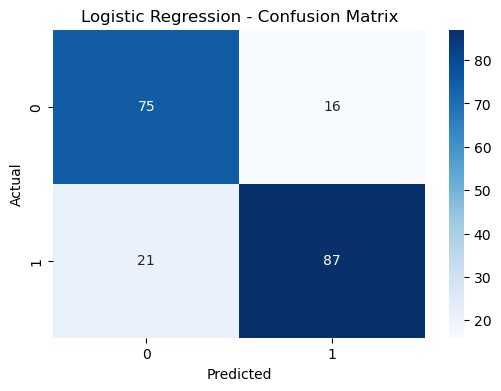

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
log_cm = confusion_matrix(y_test, log_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_preds)
print("🔹 kNN Accuracy:", knn_acc)


🔹 kNN Accuracy: 0.8492462311557789


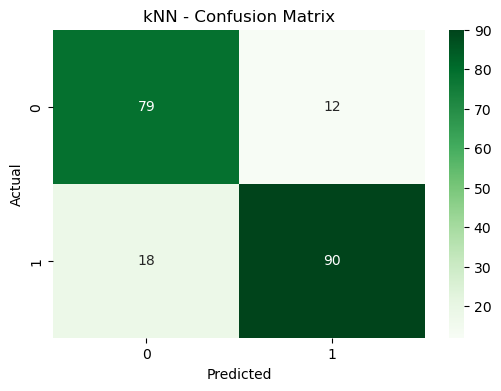

In [17]:
knn_cm = confusion_matrix(y_test, knn_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens')
plt.title("kNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
print("📌 Accuracy Comparison")
print(f"Logistic Regression: {log_acc:.4f}")
print(f"k-Nearest Neighbors: {knn_acc:.4f}")

📌 Accuracy Comparison
Logistic Regression: 0.8141
k-Nearest Neighbors: 0.8492
